<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

# Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 ### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 ### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

## Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

In [1]:
# Import
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Set current directory to /home/utilisateur/Python/FullStack/5. Supervised Machine Learning
os.chdir("/home/utilisateur/Python/FullStack/5. Supervised Machine Learning")
print(os.getcwd())


/home/utilisateur/Python/FullStack/5. Supervised Machine Learning


In [3]:
# Import & visualize dataset
df = pd.read_csv("Walmart_Store_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


<AxesSubplot:>

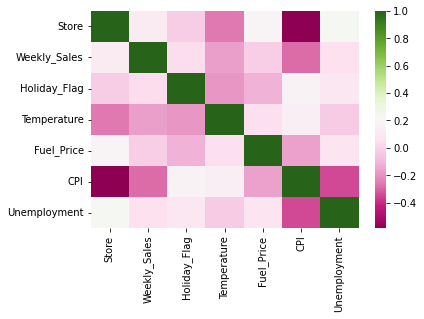

In [4]:
# Plot the heatmap and annotation on it
df_Corr = df.corr()
sns.heatmap(df_Corr, xticklabels=df_Corr.columns, yticklabels=df_Corr.columns, cmap='PiYG')

**Dataset Description :**

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales. Within this file you will find the following fields:

* Store - the store number
* Date - the week of sales
* Weekly_Sales - sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate

*Holiday Events :*
* Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
* Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
* Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
* Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


In [5]:
# Drop rows where Weekly Sales value is missing
df.dropna(subset=['Weekly_Sales'], inplace = True, axis = 'index')

In [6]:
# Create columns for year, month, day and day of week
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek # 0: monday / 6: Sunday
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [6]:
# Drop lines containing invalid values or outliers
columns_to_clean = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for column_to_clean in columns_to_clean:
    Xavg = df[column_to_clean].mean()
    Xstd = df[column_to_clean].std()
    # Upper bound
    upper = np.where(df[column_to_clean] >= (Xavg + 3*Xstd))
    # Lower bound
    lower = np.where(df[column_to_clean] <= (Xavg - 3*Xstd))
    # Removing the Outliers
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)

df.dropna(inplace=True)

In [8]:
# Create columns for year, month, day and day of week
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek # 0: monday / 6: Sunday
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [8]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'DayOfWeek', 'Day', 'Month',
       'Year'],
      dtype='object')

In [9]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ['Store', 'Date', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'DayOfWeek', 'Day', 'Month', 'Year']
X = df.loc[:,features_list]
y = df.loc[:,'Weekly_Sales']
print("...Done.")

Separating labels from features...
...Done.


In [11]:
""" # Missing values
print("Imputing missing values...")
print(X_train)
print()
imputer = SimpleImputer(strategy="mean") # Instanciate class of SimpleImputer with strategy of mean
# Other strategies : median, most_frequent, constant
# Also exists : IterativeImputer (regression)
X_train = X_train.copy() # Copy dataset to avoid caveats of assign a copy of a slice of a DataFrame
# More info here https://towardsdatascience.com/explaining-the-settingwithcopywarning-in-pandas-ebc19d799d25

X_train.iloc[:,[1,2]] = imputer.fit_transform(X_train.iloc[:,[1,2]])
# Fit and transform columns where there are missing values
print("...Done!")
print(X_train)  """

' # Missing values\nprint("Imputing missing values...")\nprint(X_train)\nprint()\nimputer = SimpleImputer(strategy="mean") # Instanciate class of SimpleImputer with strategy of mean\n# Other strategies : median, most_frequent, constant\n# Also exists : IterativeImputer (regression)\nX_train = X_train.copy() # Copy dataset to avoid caveats of assign a copy of a slice of a DataFrame\n# More info here https://towardsdatascience.com/explaining-the-settingwithcopywarning-in-pandas-ebc19d799d25\n\nX_train.iloc[:,[1,2]] = imputer.fit_transform(X_train.iloc[:,[1,2]])\n# Fit and transform columns where there are missing values\nprint("...Done!")\nprint(X_train)  '

In [10]:
# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")

numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek']
numeric_transformer = StandardScaler()
# Also exists : MinMaxScaler()

categorical_features =  ['Store', 'Holiday_Flag']
categorical_transformer = OneHotEncoder()

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )
X = featureencoder.fit_transform(X)
print("...Done.")
print(X[:5])
# Print first 5 rows (not using iloc since now X became a numpy array)

print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Allows you to stratify your sample.
# Meaning, you will have the same proportion of categories in test and train set
print("...Done.")


Encoding categorical features and standardizing numerical features...
...Done.
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          1.          0.         -1.09557528  0.19987228
  -1.20319071 -0.13115155  0.11712303 -1.08060463  1.11358616  0.24169053]
 [ 0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          1.02056138 -1.15565548
   0.89720943 -0.34465666 -1.07083917 -0.50374051  1.46919914  0.24169053]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          1.

In [13]:
""" # Encoding labels
print("Encoding labels...")
print(y_train)

labelencoder = LabelEncoder()
Y_train = labelencoder.fit_transform(y_train)
print("...Done.")
print(Y_train[:5])
# Print first 5 rows (not using iloc since now y_train became a numpy array) """

' # Encoding labels\nprint("Encoding labels...")\nprint(y_train)\n\nlabelencoder = LabelEncoder()\nY_train = labelencoder.fit_transform(y_train)\nprint("...Done.")\nprint(Y_train[:5])\n# Print first 5 rows (not using iloc since now y_train became a numpy array) '

In [11]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


In [12]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = regressor.predict(X_train)
print("...Done.")
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

### Testing pipeline ###
print("--- Testing pipeline ---")

# Predictions on test set
print("Predictions on test set...")
y_test_pred = regressor.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()


Predictions on training set...
...Done.
[1756160. 2149888. 1979136. 1604864.  839296.]

--- Testing pipeline ---
Predictions on test set...
...Done.
[1.35654400e+06 4.50688000e+05 2.01996800e+06 8.94208000e+05
 7.01364359e+17]

